# Generate basic applicant compositions

1. Preparation

In [28]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import json

In [29]:
path=Path()
parent_path=str(path.parent.absolute())[:-10]

In [30]:
removed_csv=parent_path+"/data/csvs/hmda_2017_ca_noname.csv"

In [31]:
numerics = ['loan_amount_000s', 'applicant_income_000s', 'population', 'minority_population',
            'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units',
            'number_of_1_to_4_family_units', 'application_date_indicator', 'rate_spread']
dtypes={}
for num in numerics:
        dtypes[num] = 'float64'

In [32]:
skimmed_df=pd.read_csv(removed_csv, low_memory=False, dtype=dtypes, na_values=' ')

In [33]:
js_road=parent_path+"/src/data_processing/code_map.json"

In [34]:
with open(js_road, 'r') as fh:
    code_map=json.load(fh)
    for i in code_map.keys():
        code_map[i]={int(m):n for m, n in code_map[i].items()}

In [35]:
skimmed_df.columns

Index(['as_of_year', 'respondent_id', 'agency_abbr', 'agency_code',
       'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy',
       'loan_amount_000s', 'preapproval', 'action_taken', 'msamd',
       'state_abbr', 'state_code', 'county_code', 'census_tract_number',
       'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1',
       'applicant_race_2', 'applicant_race_3', 'applicant_race_4',
       'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2',
       'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5',
       'applicant_sex', 'co_applicant_sex', 'applicant_income_000s',
       'purchaser_type', 'denial_reason_1', 'denial_reason_2',
       'denial_reason_3', 'rate_spread', 'hoepa_status', 'lien_status',
       'edit_status', 'sequence_number', 'population', 'minority_population',
       'hud_median_family_income', 'tract_to_msamd_income',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'appl

In [36]:
code_map.keys()

dict_keys(['agency', 'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy', 'preapproval', 'action_taken', 'ethnicity', 'race', 'sex', 'purchaser_type', 'denial_reason', 'hoepa_status', 'lien_status', 'edit_status', 'county'])

In [37]:
image_path=parent_path+'/result/eda/'
if not os.path.exists(image_path):
    os.makedirs(image_path)

2. Gender analysis

In [63]:
genderMap=code_map['sex'].copy()
genderMap[3]='Unknown'
genderMap[4]='Unknown'

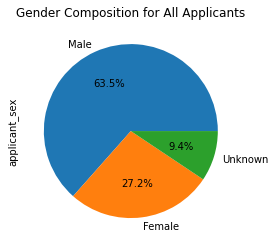

In [65]:
Sex_total=skimmed_df['applicant_sex'].replace(genderMap).value_counts()
plt.figure()
Sex_total.plot.pie(legend=False, title='Gender Composition for All Applicants',autopct='%1.1f%%')
plt.savefig(image_path+'Total_applicant_gender.png', bbox_inches='tight')


In [66]:
actionM=code_map['action_taken']

<Figure size 432x288 with 0 Axes>

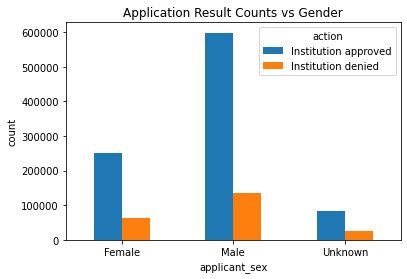

In [81]:
Sex_result=skimmed_df[['applicant_sex','action_taken']]
RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
Sex_result_b=pd.DataFrame()
Sex_result_b['action']= Sex_result['action_taken'].replace(RecodeAction)
Sex_result_b['applicant_sex']=Sex_result['applicant_sex'].replace(genderMap)
Sex_result_a1=Sex_result_b.pivot_table(index='applicant_sex', columns='action',aggfunc='size',fill_value=0)
plt.figure()
Sex_result_a1.plot.bar(title='Application Result Counts vs Gender')
plt.ylabel('count')
plt.xticks(rotation=360)
plt.savefig(image_path+'Application_result_count_gender.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

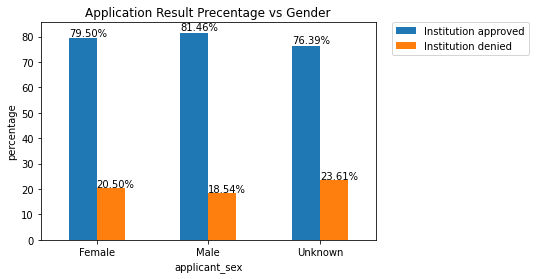

In [107]:
totalSA1=Sex_result_a1.sum(axis=1)
Sex_result_a2=Sex_result_a1.T
temp=Sex_result_a2/totalSA1.values
Sex_result_a2=temp.T*100
plt.figure()
SA2B=Sex_result_a2.plot.bar(title='Application Result Precentage vs Gender')
for p in SA2B.patches:
    SA2B.annotate(str("%.2f"%p.get_height())+'%', xy=(p.get_x(), p.get_height()*1.01))
plt.xticks(rotation=360)
plt.ylabel('percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(image_path+'Application_result_percentage_gender.png', bbox_inches='tight')